# Descenso por Gradiente y Regresión Logística

## 1. Descenso por Gradiente

Técnica utilizada para encontrar el **mínimo** de una función.

### 1.1 Funciones de costo

__Función de costo:__ es una función que mide el costo (variable dependiente) en relación a parámetros (variables independientes). El valor del costo puede tener diversas representaciones: monetario, computacional o de error.
* En el caso de Data Science, las funciones de costo suelen ser las que calculan el error (RMSE, MSE, etc.) de ajustar nuestros datos por un modelo.
* Recuerda lo siguiente: ajustar los datos por una recta tiene un costo.
* Una vez que contamos con una función de costo, nuestro objetivo suele ser *encontrar el mínimo de esta función*. Es decir, *encontrar los parámetros que corresponden al menor costo*. Estos parámetros (w0 y w1) suelen estar asociados al mejor modelo que ajusta nuestros datos.
* Optimización: se refiere a la capacidad de hacer o resolver alguna cosa de la manera más eficiente posible y, en el mejor de los casos, utilizando la menor cantidad de recursos.

__Nota:__
* Los **parámetros** son la **pendiente** y la **ordenada**.
* Hay que encontrar la **combinación de parámetros** que **minimice el costo**.

Vamos a ver el concepto de función de costo para una regresión lineal. Recordemos que una función lineal tiene la forma $y = mx + b$, donde $m$ es la pendiente y $b$ es la ordenada al origen.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os #esta libreria permite trabajar con funciones del sistema operativo 
import random

Generamos datos con ruido alrededor de una recta de la forma $y = 2x - 3$

In [2]:
x = np.linspace(-1,1,100)
m_0 = 2 # el verdadero valor de la pendiente
b_0 = -3 # el verdadero valor de la ordenada al origen
y = m_0*x + b_0 + 0.25*np.random.randn(x.size) # agregamos ruido

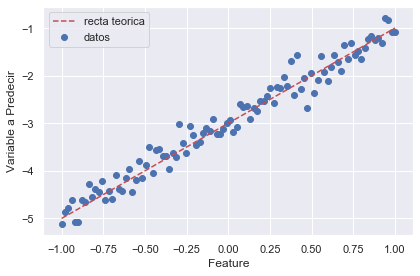

In [3]:
plt.scatter(x,y, label = 'datos')
plt.plot(x, m_0*x + b_0, '--', c = 'r', label = 'recta teorica')
plt.ylabel('Variable a Predecir')
plt.xlabel('Feature')
plt.legend()
plt.tight_layout()
if False:
    plt.savefig('Datos_ajuste_.png', dpi= 400)
plt.show()

En general, uno tiene ciertos datos y de esos datos quiere estimar los valores del modelo, en este caso, la pendiente y ordenada al origen de la recta. La hipótesis que vamos a utilizar es que la recta que mejor aproxime los datos va a ser la recta teórica que "genera" los datos.

Pero para definir la recta que "mejor aproxime" tenemos que cuantificar que es, precisamente, aproximar bien. Para ello usamos una métrica. En este caso vamos a usar MSE, pero también podría ser RMSE (equivalente a MSE) o MAE (cambia un poco la recta obtenida).

In [4]:
def MSE(y,y_pred):
    '''Calcula Mean Squared Error'''
    assert(len(y) == len(y_pred))
    n = len(y)
    return ((y - y_pred)**2).sum()/n

# assert te permite expresar una condición que ha de ser cierta siempre, ya que de no serlo se interrumpirá el programa

# def RMSE(y,y_pred):
#     '''Calcula Root Mean Squared Error'''
#     assert(len(y) == len(y_pred))
#     cost = MSE(y,y_pred)
#     return np.sqrt(cost)

# def MAE(y,y_pred):
#     '''Calcula Mean Absolut Error'''
#     assert(len(y) == len(y_pred))
#     n = len(y)
#     return (np.abs(y - y_pred)).sum()/n

#### **Un parametro libre**

Supongamos que conocemos la ordenada al origen $b$, y solamente tenemos que obtener la pendiente $m$. Lo que podemos hacer entonces es *barrer* distintos valores para $m$ y ver a cuál corresponde el mínimo del costo. **Importante**: en este caso, la función de costo depende de un único parámetro, $m$.

In [5]:
%%time # determina cuánto tiempo demora en correr la celda
m_s = np.linspace(-5,5,1000)
b = -3
costos = []
for m in m_s:
    y_pred = m*x + b
    costos.append(MSE(y,y_pred))

costos = np.array(costos)

# Aplico fuerza bruta

Wall time: 40 ms


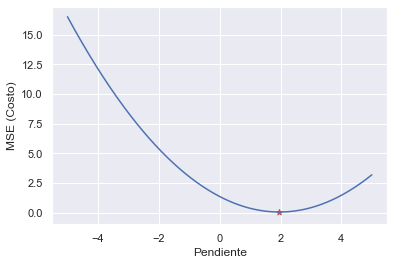

In [6]:
indice_minimo = np.argmin(costos)

plt.plot(m_s, costos)
plt.scatter(m_s[indice_minimo], costos[indice_minimo], marker = '*', c = 'r')
plt.xlabel('Pendiente')
plt.ylabel('MSE (Costo)')
plt.show()

* Halló la función con el menor costo, que es con **pendiente = 2**.

#### **Dos parámetros libres**

Antes de continuar, piensa qué modificarían en el caso de tener que encontrar no uno sino dos parámetros libres. Es decir, $m$ y $b$. En este caso, ¿de cuántos parámetros depende la función de costo?¿Cómo será su visualización?

In [7]:
m_s = np.linspace(-5,5,500)
b_s = np.linspace(-5,0,500)
# Busca m y b (ambos)

In [8]:
%%time
costos = []
for m in m_s:
    for b in b_s:
        y_pred = m*x + b
        costos.append(MSE(y,y_pred))
costos = np.array(costos)

Wall time: 6.39 s


**Visualización**

In [9]:
Ms, Bs = np.meshgrid(m_s,b_s, indexing = 'ij')
# meshgrid: hace una malla de varias dimensiones
# indexing = 'ij': muestra una matriz de salida

costos_matriz = costos.reshape(m_s.size, b_s.size) # se convierte el vector en matriz

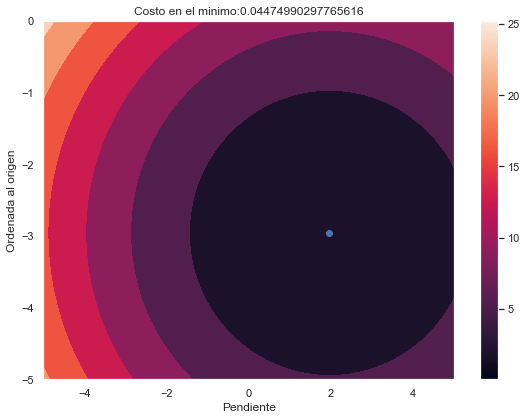

In [10]:
idxs_minimo = np.unravel_index(costos_matriz.argmin(), costos_matriz.shape)
fig = plt.figure(figsize = (8,6))
ax = fig.gca()

plt.pcolormesh(Ms, Bs,costos_matriz)
ax.contourf(Ms, Bs, costos_matriz)
plt.colorbar()
plt.scatter(Ms[idxs_minimo], Bs[idxs_minimo])
plt.title('Costo en el minimo:' + str(costos_matriz[idxs_minimo]))
plt.xlabel('Pendiente')
plt.ylabel('Ordenada al origen')
plt.tight_layout()
plt.show()

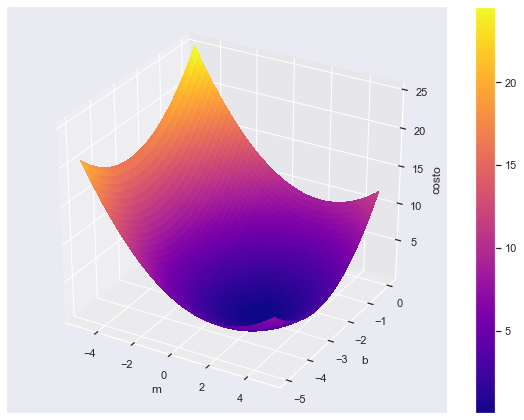

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize = (8,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Ms, Bs,costos_matriz,linewidth=0.0, antialiased=False, cmap = 'plasma')
# ax.view_init(0, 180)
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('costo')
plt.tight_layout()
plt.colorbar(surf)    
# plt.savefig('costo_3d.png', dpi = 400)
plt.show()

Graficamos la recta que encontramos y la comparamos con la distribución de datos y la recta teórica.

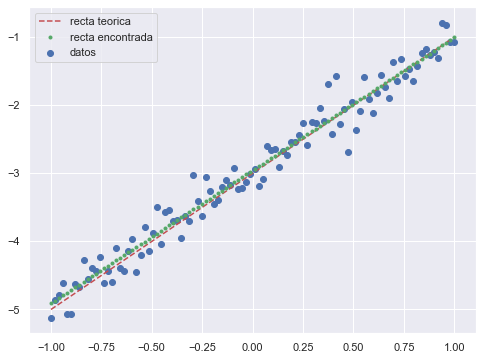

In [12]:
m_encontrado = Ms[idxs_minimo]
b_encontrado = Bs[idxs_minimo]

plt.figure(figsize = (8,6))
plt.scatter(x,y, label = 'datos')
plt.plot(x, m_0*x + b_0, '--', c = 'r', label = 'recta teorica')
plt.plot(x, m_encontrado*x +b_encontrado, '.', c = 'g', label = 'recta encontrada')
plt.legend()
plt.show()

### 1.2 Descenso por gradiente

**Descenso por gradiente** es una técnica que se utiliza para encontrar el mínimo de una función. Consiste en un proceso iterativo.

**Nota**: La idea que les tiene que quedar es que podemos obtener la dirección en la cual movernos para llegar al mínimo de la función de costo.


Para hacer descenso por gradiente necesitamos las derivadas. Notar que la función de costo es función de la pendiente $m$ y la ordenada al origen $b$. Para simplificar, vamos a asumir que después de hacer varios reemplazos y algunas cuentas, la función de costo tiene la siguiente forma:

$$MSE(m, b) = (m-2)^2 + (b+3)^2$$

¿Están de acuerdo que el mínimo se obtiene para $m = 2$ y $b = -3$? Si no estás de acuerdo, discutir con un/a compañero/a hasta que lo estés.
* Es coherente, porque es lo que visualizaba en el gráfico anterior. Si reemplazamos esos valores de los parámetros **da 0**.

¿Cómo hacemos en una función matemática para ver la dirección de máximo descenso?  
Sería el equivalente a tener otra función que te indique para donde crece o decrece más la colina en ese punto.  
En matemática, la `derivada` de una función en un punto específico nos dice exactamente eso.  

Usamos derivadas parciales para encontrar cómo cada parámetro individual (m y b) afecta a MSE, así que de ahí proviene la palabra parcial . Tomamos estos derivados con respecto my por b separado.  

**Gradiente:** procedimiento matemático para *obtener la dirección de mayor descenso*.  
¡Una aclaración! El gradiente en realidad nos indica la dirección de mayor ascenso. En descenso por gradiente, nos movemos en dirección contraria al gradiente.  

**Regla de la Cadena:** dice que debemos tomar una derivada de una función externa, mantener intacta una función interna y luego multiplicar todo por la derivada de la función interna. 
  
Escribimos la función MSE, sus derivadas y el gradiente.

In [13]:
def MSE_m_y_b(m,b):
    return (m-2)**2 + (b+3)**2

def der_MSE_m(m,b):
    '''Derivada de MSE respecto a m'''
    return 2*(m-2)

def der_MSE_b(m,b):
    '''Derivada de MSE respecto a b'''
    return 2*(b+3)

def gradiente(m,b):
    gradiente = np.array([der_MSE_m(m,b), der_MSE_b(m,b)])
    return gradiente

Elegimos un valor al azar para $m$ y otro para $b$ y calculamos el gradiente.

In [14]:
m_prueba = -1 # Solo aca tienen que cambiar
b_prueba = -2 # Solo aca tienen que cambiar

grad = gradiente(m_prueba, b_prueba)
print(grad)

### Esto es para que tenga norma 1. Ignorar
grad = grad/np.linalg.norm(grad)
print(grad)

[-6  2]
[-0.9486833   0.31622777]


Y ahora graficamos la función de costo con menos el gradiente obtenido para el punto elegido.

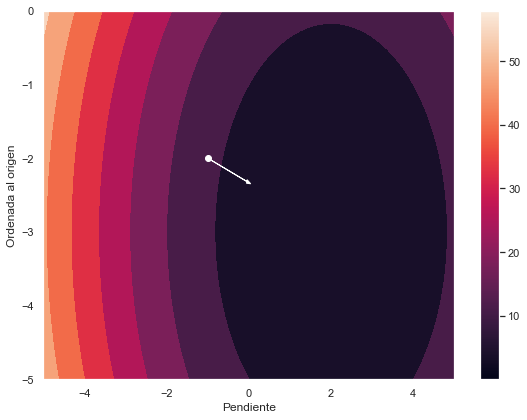

In [15]:
fig = plt.figure(figsize = (8,6))
ax = fig.gca()

plt.pcolormesh(Ms, Bs,MSE_m_y_b(Ms, Bs))
ax.contourf(Ms, Bs, MSE_m_y_b(Ms, Bs))
plt.colorbar()

plt.scatter(m_prueba,b_prueba, c="white")

##Asegurate de entender bien que significan los parámetros: m_prueba,b_prueba, -grad[0] y -grad[1]. ¿Por qué el grad está en negativo?
plt.arrow(m_prueba,b_prueba, -grad[0], -grad[1], head_width=0.05, head_length=0.1, fc='white', ec='white')

plt.xlabel('Pendiente')
plt.ylabel('Ordenada al origen')
plt.tight_layout()
plt.show()

**Para probar:** Modifica los valores de `m_prueba` y `b_prueba` y convercerse de que el negativo del gradiente apunta hacia el mínimo. **Importante**: ¿Cuánto vale el gradiente en el mínimo? **Es 0**.


**Descenso por gradiente**

Descenso por gradiente consiste entonces en ir haciendo sucesivos pasos, siguiendo la dirección que marca el negativo del gradiente, hasta llegar al mínimo o muy cerca de él. En general:

1. Empezamos con valores aleatorios de los parámetros (calculamos el costo para ciertos valores al azar de parámetro).
2. Repetimos tantas veces como sea necesario.
    1. Calculamos el gradiente (derivadas) de la función de costo respecto al valor actual de los parámetros.
    2. Actualizamos los valores de los parámetros siguiendo menos la derivada para cada uno.
    $$ m_{nuevo} = m_{viejo} - \alpha * \frac{dMSE(m,b)}{dm} $$
    $$ b_{nuevo} = b_{viejo} - \alpha * \frac{dMSE(m,b}{db} $$
      
      
Al **hiperparámetro** $\alpha$ se lo conoce como **learning rate** y lo van a encontrar en casi todos los frameworks donde se implemente descenso por gradiente. Es, sin duda, uno de los principales hiperparámetros en cualquier implementación.

¿de qué tamaño debe ser el paso para descender? Para esto vamos a incorporar el hiperparámetro **learning rate**, que regula qué tan grande debe ser el paso en ese punto.

Lo implementamos. Definimos donde empezar, cuantos pasos hacer y el *learning rate*.

In [16]:
m = -1   # por ahora, los elegimos a mano, pero deberia ser al azar
b = -1   # por ahora, los elegimos a mano, pero deberia ser al azar

max_steps = 50 # Modificar despues
alpha = 0.1

Ejecutamos descenso por gradiente la cantidad de pasos que sea necesario.

In [17]:
costos = []
m_obtenidos = []
b_obtenidos = []

for step in range(max_steps):
    costos.append(MSE_m_y_b(m,b))
    m_obtenidos.append(m)
    b_obtenidos.append(b)
    m = m - alpha*der_MSE_m(m,b)
    b = b - alpha*der_MSE_b(m,b)

# Agregamos el ultimo paso que no lo hicimos
costos.append(MSE_m_y_b(m,b))
m_obtenidos.append(m)
b_obtenidos.append(b)

# Llevamos a arreglos
costos = np.array(costos)
m_obtenidos = np.array(m_obtenidos)
b_obtenidos = np.array(b_obtenidos)

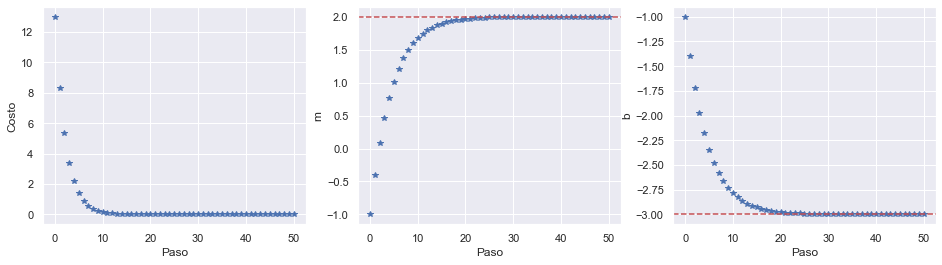

In [18]:
plt.figure(figsize = (16,4))

plt.subplot(1,3,1)
plt.plot(costos, '*')
plt.xlabel('Paso')
plt.ylabel('Costo')

plt.subplot(1,3,2)
plt.plot(m_obtenidos, '*')
plt.axhline(m_0, linestyle = '--', c = 'r', label = 'm real')
plt.xlabel('Paso')
plt.ylabel('m')

plt.subplot(1,3,3)
plt.plot(b_obtenidos, '*')
plt.axhline(b_0,  linestyle = '--', c = 'r', label = 'b real')
plt.xlabel('Paso')
plt.ylabel('b')

plt.show()

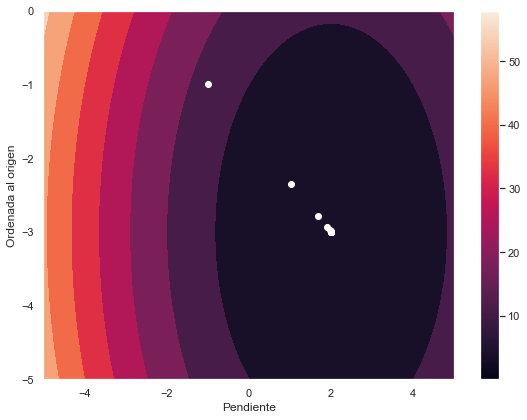

In [19]:
fig = plt.figure(figsize = (8,6))
ax = fig.gca()

plt.pcolormesh(Ms, Bs,MSE_m_y_b(Ms, Bs))
ax.contourf(Ms, Bs, MSE_m_y_b(Ms, Bs))
plt.colorbar()
plt.scatter(m_obtenidos[::5],b_obtenidos[::5], c="white") #notar que grafica cada 5 pasos
plt.xlabel('Pendiente')
plt.ylabel('Ordenada al origen')
plt.tight_layout()
plt.show()

### ¿Anda siempre?

In [20]:
x = np.linspace(-1,1,500)
y = np.sin(10*x)

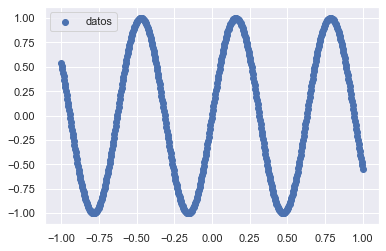

In [21]:
plt.scatter(x,y, label = 'datos')
plt.legend()
plt.show()

In [22]:
w_s = np.linspace(0,50,1000)
costos = []
for w in w_s:
    y_pred = np.sin(w*x)
    costos.append(MSE(y,y_pred))
costos = np.array(costos)

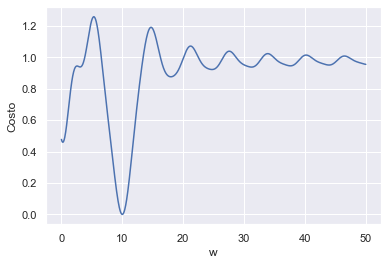

In [23]:
plt.plot(w_s, costos)
plt.xlabel('w')
plt.ylabel('Costo')
plt.show()

Notar que hay muchos *mínimos locales* y un *mínimo absoluto*. En más dimensiones, es fácil confundir un mínimo local con el mínimo que estamos buscando.

**Variantes de descenso por el gradiente (para acelerar/mejorar la convergencia)**:
1. Stochastic gradient descent (SGD)
2. Minibatches
3. Agregar un término para dar inercia a la búsqueda, tratando de pasar por alto mínimos locales.

## 2. Regresión logística

Modelo lineal para clasificación binaria.

La **regresión logística** es un método que aproxima los puntos por una función logística/sigmoide.
La función sigmoide es una función que toma valores continuos y devuelve un valor entre 0 y 1.

Lo que hace la regresión logística es encontrar w0 y w1 que mejor aproximen los puntos pertenecientes a cada clase.

**Nota 1:** La regresión logística es el equivalente a la **regresión lineal en clasificación**. De alguna forma, es uno de los modelos más fundamentales. Pero la equivalencia también va por otro lado: ambos modelos son lineales. La regresión lineal es el modelo que trata de encontrar la mejor recta que pasa por nuestros puntos. La regresión lineal trata encontrar la mejor recta que separa nuestros puntos.

**Nota 2:** No deben existir correlaciones lineales entre los atributos, porque de ésta forma el modelo no va a ser el adecuado.

En Scikit-Learn, la regresión logística se implementa como cualquier otro modelo de clasificación. Veamos dos ejemplos, uno 1D y otro 2D. Para simplificar la exposición, no vamos a hacer un `train_test_split`, pero esto no significa que no haya que hacerlo.

### 2.1 Un Atributo

In [24]:
from matplotlib import cm

from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [25]:
def sigmoid_function(x,w0, w1):
    '''Equivalente a perceptron con funcion de activacion sigmoide'''    
    z = w0 + w1*x # notar que es una funcion lineal
    y = 1/(1 + np.exp(-z)) # notar que es una composicion
    return y

# “z” es la variable independiente (lo que metemos en la función) e “ y” es la variable dependiente (lo que devuelve)
# w1 controla la inclinación de la curva en la zona de cambio. Números w1 altos hacen que el crecimiento sea más pronunciados
# w0 mueve la curva hacia la derecha o la izquierda, según su valor. No implica que se corra de a 1 punto 

Lo que necesitamos es una función de costo que se conoce como **entropía cruzada** (o entropía cruzada categórica): combina las etiquetas (0 ó 1), con los valores que devuelve la función logística (valores continuos entre 0 y 1). Es decir, mide la diferencia entre un valor discreto (las etiquetas) y un valor continuo (la probabilidad de pertenecer a la clase 1).

Empecemos generando datos: 1 atributos, dos clases.

In [26]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=1,
                  random_state=1, cluster_std= 1.5)

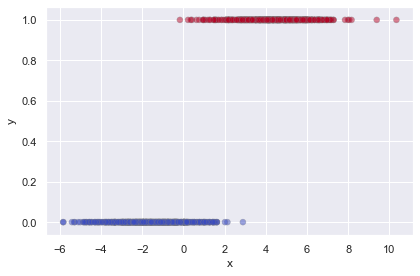

In [27]:
plt.scatter(X, y, c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

Como siempre, es muy importante leer la documentación del clasificador. En este caso, `LogisticRegression`.

In [28]:
clf = LogisticRegression().fit(X,y)

In [29]:
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

0.974

Veamos los parámetros obtenidos:

In [30]:
print(clf.coef_, clf.intercept_)

[[2.44855129]] [-3.39207913]


Con estos parámetros, podemos graficar la curva obtenida por la regresión logística. Ojo, ésta NO es la frontera de decisión. Usamos la función que definimos más arriba, `sigmoid_function`.

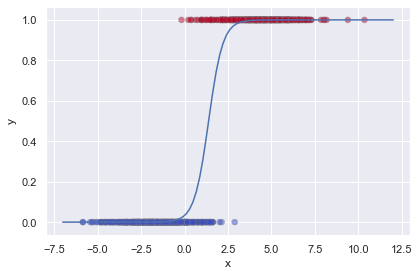

In [31]:
plt.scatter(X, y, c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)

x_plot = np.linspace(-7,12,100)
plt.plot(x_plot, sigmoid_function(x_plot,clf.intercept_[0], clf.coef_[0][0]))

plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

Otra forma de obtener esa curva habría sido usando el método `predict_proba` del clasificador:

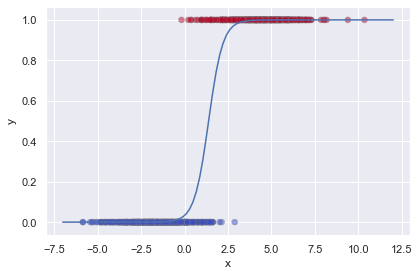

In [32]:
plt.scatter(X, y, c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)

x_plot = np.linspace(-7,12,100)
y_plot = clf.predict_proba(x_plot.reshape(-1,1))[:,1]
plt.plot(x_plot, y_plot)

plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

### 2.2 Dos atributos

La extensión al caso con dos atributos es prácticamente igual. La única diferencia es que las herramientas para visualizar son un poco más complejas.

In [33]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2,
                  random_state=1, cluster_std= 2.0)

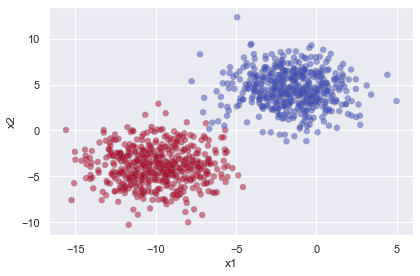

In [34]:
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()
plt.show()

Entrenamos y calculamos error:

In [35]:
clf = LogisticRegression().fit(X,y)
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

0.998

Y, ahora sí, **graficamos los puntos junto con la frontera obtenida**.

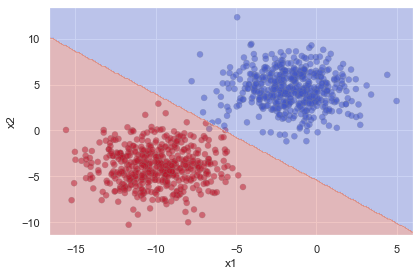

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap =cm.coolwarm)

plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()
plt.savefig('RL_2D_2.png', dpi = 300)
plt.show()

Si graficar la probabilidad

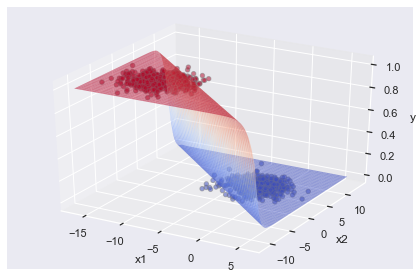

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],y, c = y,alpha = 0.5, lw = 1, edgecolors= 'grey', cmap=cm.coolwarm)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = (clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]).reshape(xx.shape)


surf = ax.plot_surface(xx, yy, Z, cmap=cm.coolwarm,
                   linewidth=0, antialiased=True, alpha = 0.5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.tight_layout()
# plt.savefig('RL_2D_3.png', dpi = 300)

plt.show()

### 2.3 Ejercitación

Si no conoces la historia del Challenger, puedes leerla [aquí](https://es.wikipedia.org/wiki/Transbordador_espacial_Challenger).

El objetivo es entrenar una regresión logística sobre los datos obtenido y decidir si el día del despegue del Challenger había información que sugiriera que podía haber un accidente.

Nosotros nos encargamos del preprocesamiento y de los gráficos. Tu te encargarás de entrenar el modelo.

In [38]:
import pandas as pd

dataset = pd.read_csv('Data\DS_Bitácora_24_Challenger.csv')
dataset.dropna(inplace = True) # Tiramos los NaN (una sola fila)
dataset['Temperature (C)'] = np.round((dataset['Temperature'] - 32)/1.8,2) # pasamos a celcius
dataset

,Date,Temperature,Damage Incident,Temperature (C)
0,04/12/1981,66,0,18.89
1,11/12/1981,70,1,21.11
2,3/22/82,69,0,20.56
4,01/11/1982,68,0,20.00
5,04/04/1983,67,0,19.44
6,6/18/83,72,0,22.22
7,8/30/83,73,0,22.78
8,11/28/83,70,0,21.11
9,02/03/1984,57,1,13.89
10,04/06/1984,63,1,17.22


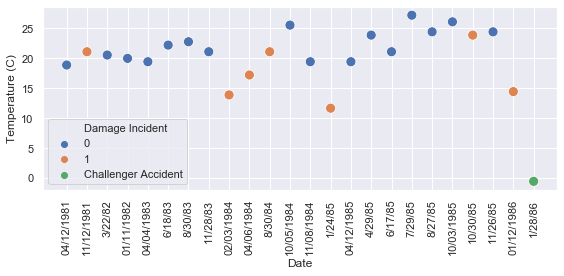

In [39]:
plt.figure(figsize = (8,4))
plot = sns.scatterplot(x = 'Date', y  = 'Temperature (C)', hue = 'Damage Incident', data = dataset, s = 100)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.tight_layout()
# plt.savefig("challenger1.png", dpi = 300)
plt.show()

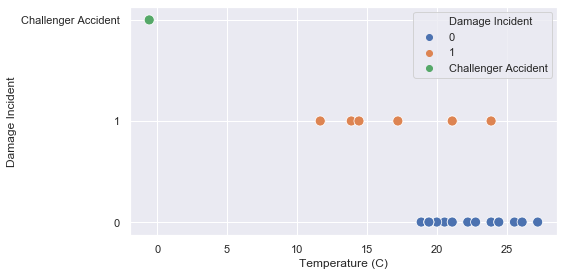

In [40]:
# dataset.drop([24], inplace = True)
plt.figure(figsize = (8,4))
plot = sns.scatterplot(x = 'Temperature (C)', y  = 'Damage Incident', hue = 'Damage Incident', data = dataset, s = 100)
plt.tight_layout()
# plt.savefig("challenger2.png", dpi = 300)
plt.show()

**Variables para entrenamiento**

In [41]:
X = dataset.drop([24])['Temperature (C)'].values.reshape(-1, 1)
y = dataset.drop([24])['Damage Incident'].values.astype(int)

Ahora sí, te dejamos solo/a. 

1. Entrena una regresión logística y calcula su desempeño. Puedes usar exactitud u otra métrica que consideres apropiada.
1. Grafica la probabilidad en función de la temperatura. 
1. ¿Qué predice tu clasificador para el caso del Challenger?

No te preocupes por hacer un `train_test_split`, este ejemplo es más bien demostrativo.